### Check Raman sideband cooling on axial for n=2

In [1]:
import numpy as np
import scipy.constants as cts
import scipy.stats as stats
import gc
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from scipy.special import hermite, factorial
import RSC_functions
from pathos.multiprocessing import Pool

In [2]:
mol = RSC_functions.molecules(n=[2, 2, 2])
res = mol.Raman_transition(axis=2, delta_n=-1, time=np.pi/0.4)
res = mol.Optical_pumping()

Before cooling, motinoal state: [2, 2, 2], internal state 1
Cooling success, motinoal state: [2, 2, 1], internal state -1
After OP # 1, photon scatter at ['1.508', '1.733'], |Δk|/k = 1.458, Δk/k = ['0.161', '-0.985', '-1.063'], motional quanta [2, 1, 0], pump to state -1
After OP # 2, photon scatter at ['2.958', '0.925'], |Δk|/k = 0.183, Δk/k = ['-0.110', '-0.146', '-0.017'], motional quanta [2, 1, 0], pump to state 0
After OP # 3, photon scatter at ['1.528', '1.928'], |Δk|/k = 1.954, Δk/k = ['1.057', '-1.643', '-0.043'], motional quanta [1, 3, 0], pump to state -1
After OP # 4, photon scatter at ['2.400', '5.755'], |Δk|/k = 0.725, Δk/k = ['-0.584', '0.341', '-0.263'], motional quanta [1, 3, 0], pump to state 1
Success after 4 OP cycles


In [3]:
mol = RSC_functions.molecules(n=[2, 2, 2])
res = mol.Raman_transition(axis=2, delta_n=-1, time=np.pi/0.4)
res = mol.Optical_pumping()

Before cooling, motinoal state: [2, 2, 2], internal state 1
Cooling success, motinoal state: [2, 2, 1], internal state -1
After OP # 1, photon scatter at ['2.576', '0.436'], |Δk|/k = 0.558, Δk/k = ['-0.486', '-0.226', '-0.156'], motional quanta [2, 2, 2], pump to state 1
Success after 1 OP cycles


In [4]:
mol = RSC_functions.molecules(n=[2, 2, 2])
res = mol.Raman_transition(axis=2, delta_n=-1, time=np.pi/0.4)
res = mol.Optical_pumping()

Before cooling, motinoal state: [2, 2, 2], internal state 1
Cooling fail, motinoal state: [2, 2, 2], internal state 1


In [5]:
mol = RSC_functions.molecules(n=[2, 2, 2])
res = mol.Raman_transition(axis=2, delta_n=-1, time=np.pi/0.4)
res = mol.Optical_pumping()

Before cooling, motinoal state: [2, 2, 2], internal state 1
Cooling success, motinoal state: [2, 2, 1], internal state -1
After OP # 1, photon scatter at ['2.891', '6.078'], |Δk|/k = 0.250, Δk/k = ['-0.242', '0.050', '-0.031'], motional quanta [2, 2, 1], pump to state 0
After OP # 2, photon scatter at ['0.227', '5.713'], |Δk|/k = 1.249, Δk/k = ['0.517', '-0.585', '-0.974'], motional quanta [2, 2, 4], pump to state 1
Success after 2 OP cycles


In [5]:
mol = RSC_functions.molecules(n=[2, 2, 2])
res = mol.Raman_transition(axis=2, delta_n=-1, time=np.pi/0.4)
res = mol.Optical_pumping()

Before cooling, motinoal state: [2, 2, 2], internal state 1
Cooling success, motinoal state: [2, 2, 1], internal state -1
After OP # 1, photon scatter at ['1.603', '5.976'], |Δk|/k = 1.391, Δk/k = ['-0.953', '0.303', '-0.968'], motional quanta [3, 2, 3], pump to state 0
After OP # 2, photon scatter at ['1.613', '3.995'], |Δk|/k = 1.366, Δk/k = ['1.364', '0.045', '0.042'], motional quanta [5, 2, 3], pump to state 1
Success after 2 OP cycles


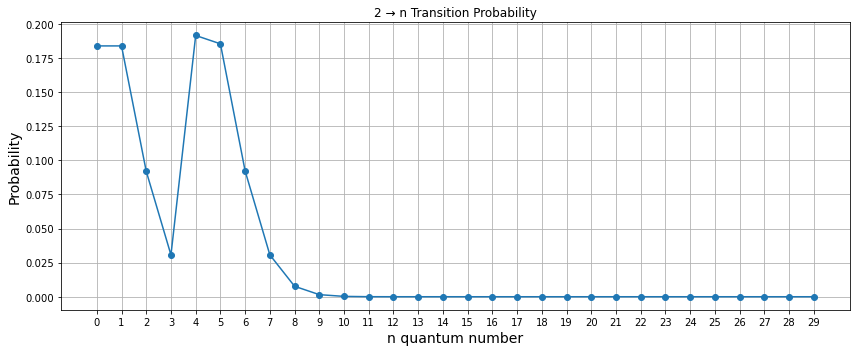

In [7]:
# Parameters
ld_par = 1
n_init = 2
ns = np.arange(0, 30)

# Plot setup
plt.figure(figsize=(12, 5))
y_plot = [RSC_functions.M_factor(n_init, n, ld_par)**2 for n in ns]
plt.plot(ns, y_plot, 'o-')
# Plot formatting
plt.title(f'{n_init} → n Transition Probability')
plt.xlabel('n quantum number', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xticks(ns)
plt.grid(True)
plt.tight_layout()
plt.show()


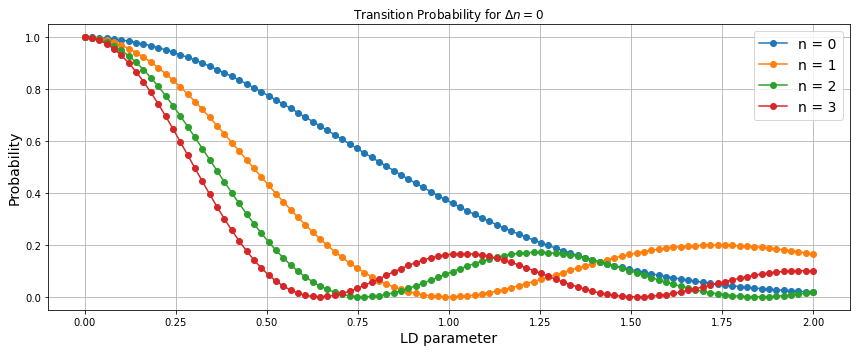

In [14]:
# Parameters
n_inits = [0, 1, 2, 3]
ld_pars = np.linspace(0, 2, 100)

# Plot setup
plt.figure(figsize=(12, 5))
for n_init in n_inits:
    y_plot = [RSC_functions.M_factor(n_init, n_init, ld_par)**2 for ld_par in ld_pars]
    plt.plot(ld_pars, y_plot, 'o-', label=f'n = {n_init}')
# Plot formatting
plt.title(f'Transition Probability for $\Delta n=0$')
plt.xlabel('LD parameter', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


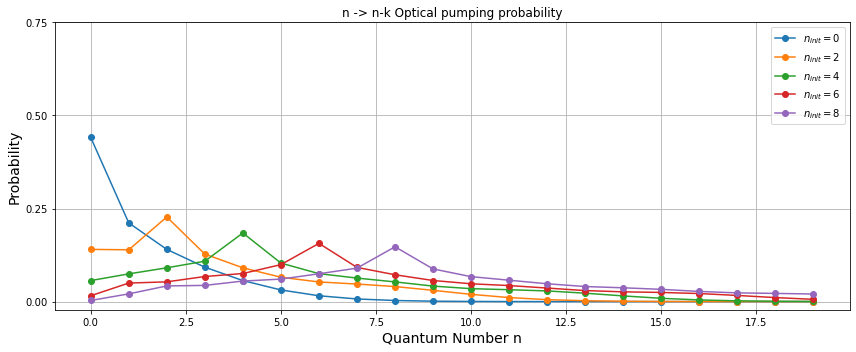

In [10]:
### Plot distribution spread after one photon of optical pumping
par_LD = 1  # Lamb-Dicke parameter
op_inc_angle = 0.  # Incident angle of the pumping beam
n_values = np.arange(-20, 20)
plt.figure(figsize=(12, 5))
for n_init in [0, 2, 4, 6, 8]:
    op_spread = [RSC_functions.OP_prob(n_init, n_init+ n, par_LD, op_inc_angle) for n in n_values if n_init+ n >= 0 and n_init+ n < 20]
    plt.plot([n_init+n for n in n_values if n_init+n>=0  and n_init+ n < 20], op_spread/(sum(op_spread)), marker='o', label='$n_{init}=$'+f'{n_init}')
plt.title('n -> n-k Optical pumping probability')
plt.xlabel('Quantum Number n', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.yticks(np.arange(0, 1., 0.25))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
RSC_functions.convert_to_LD(0.1, 2*np.pi*10e3)

9.25513150225488e-09